Python implementation of k-means clustering in 2D

In [111]:
import numpy as np
import matplotlib.pyplot as plt
import random as r
import math as m

In [112]:
def make_data(no_points):
    
    x_points = []
    y_points = []
    
    for point in range(no_points):
        x_pos, y_pos = r.randrange(100)/10, r.randrange(100)/10
        x_points.append(x_pos)
        y_points.append(y_pos)
    
    return x_points, y_points

def init_centroids(k):
    
    x_centroids = []
    y_centroids = []
    
    for i in range(k):
        x_centroid, y_centroid = r.randrange(100)/10, r.randrange(100)/10
        x_centroids.append(x_centroid)
        y_centroids.append(y_centroid)
        
    return x_centroids, y_centroids

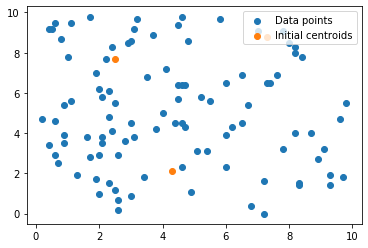

In [118]:
x_points, y_points = make_data(100)
x_centroids, y_centroids = init_centroids(3)

plt.scatter(x_points, y_points, label='Data points')
plt.scatter(x_centroids, y_centroids, label='Initial centroids')
plt.legend(loc='upper right')
plt.show()